# Import Library

In [ ]:
# Untuk manipulasi dan analisis data
import pandas as pd

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk modeling, preprocessing, dan evaluasi
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Load Dataset

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d muhammadbinimran/housing-price-prediction-data
! unzip 'housing-price-prediction-data.zip'

Dataset URL: https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data
License(s): other
Archive:  housing-price-prediction-data.zip
  inflating: housing_price_dataset.csv  


In [ ]:
house = pd.read_csv('housing_price_dataset.csv')

In [ ]:
house

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


Insight:

- Terdapat 50.000 baris dalam dataset.
- Terdapat 6 kolom dalam dataset yang mencakup: SquareFeet, Bedrooms, Bathrooms, Neighborhood, YearBuilt, dan Price

# Exploratory Data Analysis

## Variable Description

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
house['Neighborhood'].unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

Insight:
- Terdapat 1 kolom dengan tipe object, yakni Neighborhood. Kolom ini merupakan fitur non-numerik, sehingga nantinya akan dilakukan konversi ke numerik untuk kebutuhan analisis.
- Terdapat 4 kolom dengan tipe int64, yakni SquareFeet, Bedrooms, Bathrooms, dan YearBuilt. Seluruh kolom ini merupakan fitur numerik.
- Terdapat 1 kolom dengan tipe float64, yakni Price. Kolom ini juga merupakan fitur numerik.
- SquareFeet merepresentasikan luas bangunan rumah dalam satuan kaki persegi (ukuran total area)
- Bedrooms merepresentasikan jumlah kamar tidur yang tersedia di setiap rumah.
- Bathrooms merepresentasikan jumlah kamar mandi yang tersedia di setiap rumah.
- Neighborhood merepresentasikan area lingkungan dari setiap rumah dengan  3 pilihan utama berupa Rural, Suburb, Urban.
- YearBuilt merepresentasikan tahun di mana setiap rumah dibangun.
- Price merupakan fitur target, yang merepresentasikan harga dari sebuah rumah.

In [ ]:
house.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


Insight:
- Jumlah sampel pada seluruh kolom numerik terdiri dari 50.000 sampel.
- Diketahui bahwa rata-rata luas bangunan rumah adalah 2006,37 kaki persegi, dengan rentang ukuran mulai dari 1000 hingga 2999 kaki persegi. Persebarannya cukup besar yang dapat menunjukkan bahwa ukuran rumah bervariasi antarsampel.
- Diketahui bahwa rumah dalam dataset ini memiliki rata-rata 3 kamar tidur, dengan jumlah minimum 2 kamar dan maksimum 5 kamar. Persebarannya kecil, yang menandakan persebaran relatif konsisten.
- Diketahui bahwa rata-rata rumah memiliki 1 kamar mandi, dengan jumlah maksimum 3 kamar mandi. Persebarannya juga rendah, yang mengindikasikan bahwa sebagian besar rumah memiliki jumlah kamar mandi yang hampir sama.
- Diketahui bahwa rumah-rumah dalam dataset ini rata-rata dibangun pada tahun 1985, dengan tahun pembangunan tertua 1950 dan terbaru 2021. Persebarannya tidak terlalu tinggi dan tidak terlalu rendah (sedang), yang menandakan bahwa tahun pembangunan rumah beragam tapi tidak ekstrem.
- Diketahui bahwa harga rata-rata rumah tersebut adalah 224.827,32, dengan harga termurah sebesar -36.588,16 dan harga tertinggi 492.195,25. Nilai harga yang negatif menunjukkan adanya anomali data atau kesalahan input yang perlu diperiksa lebih lanjut. Persebarannya terlihat cukup besar, yang dapat menandakan bahwa harga rumah bervariasi.

## Missing Values

In [ ]:
house.isna().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


Insight:

Dataset tidak mengandung nilai kosong.

## Outlier Detection and Handling

**Memeriksa Outlier**

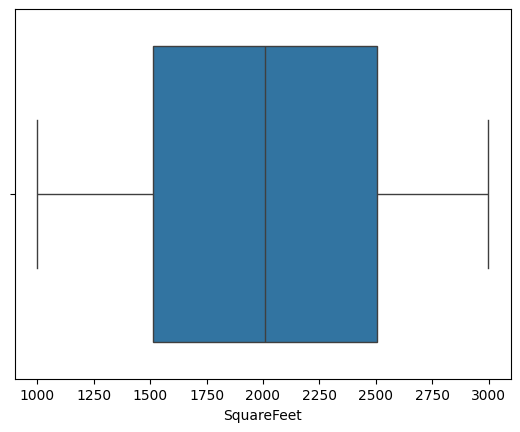

In [ ]:
sns.boxplot(x=house['SquareFeet'])
plt.show()

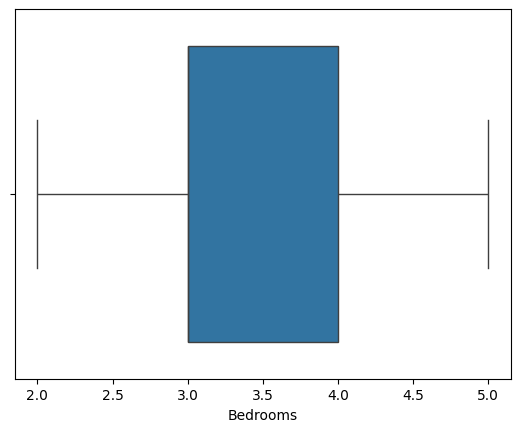

In [ ]:
sns.boxplot(x=house['Bedrooms'])
plt.show()

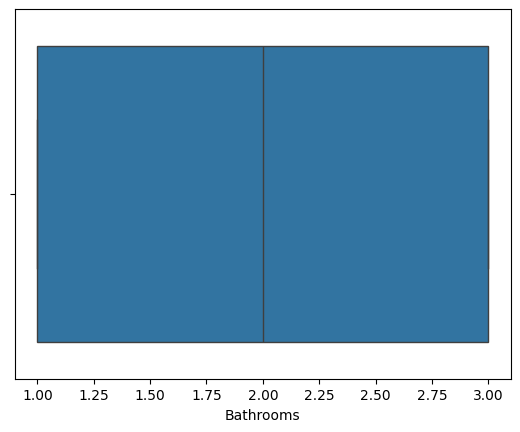

In [ ]:
sns.boxplot(x=house['Bathrooms'])
plt.show()

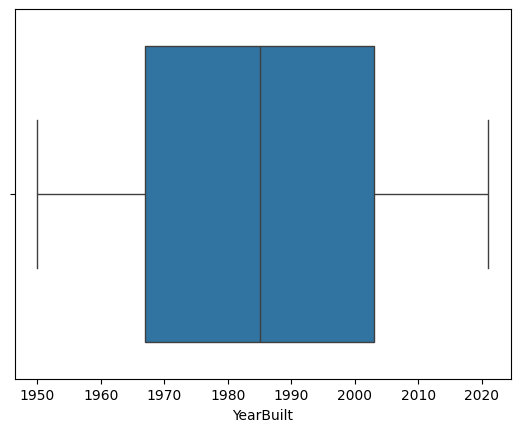

In [ ]:
sns.boxplot(x=house['YearBuilt'])
plt.show()

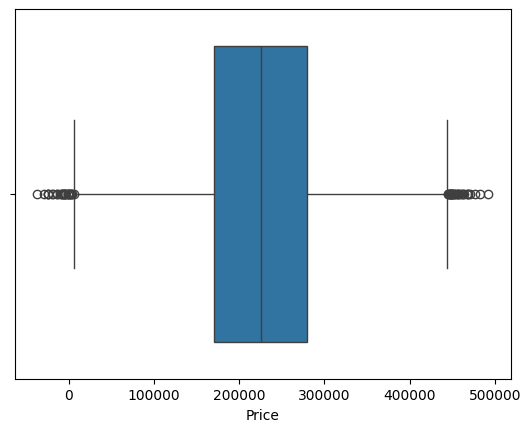

In [ ]:
sns.boxplot(x=house['Price'])
plt.show()

Insight:
- Hasil visualisasi menggunakan boxplot pada seluruh fitur numerik menunjukkan bahwa outliers hanya ditemukan pada fitur Price, sehingga perlu dilakukan penanganan pada fitur tersebut.

## Univariate Analysis

In [ ]:
# Membagi fitur sesuai dengan karakteristik
numerical_features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']
categorical_features = ['Neighborhood']

**Fitur Numerik**

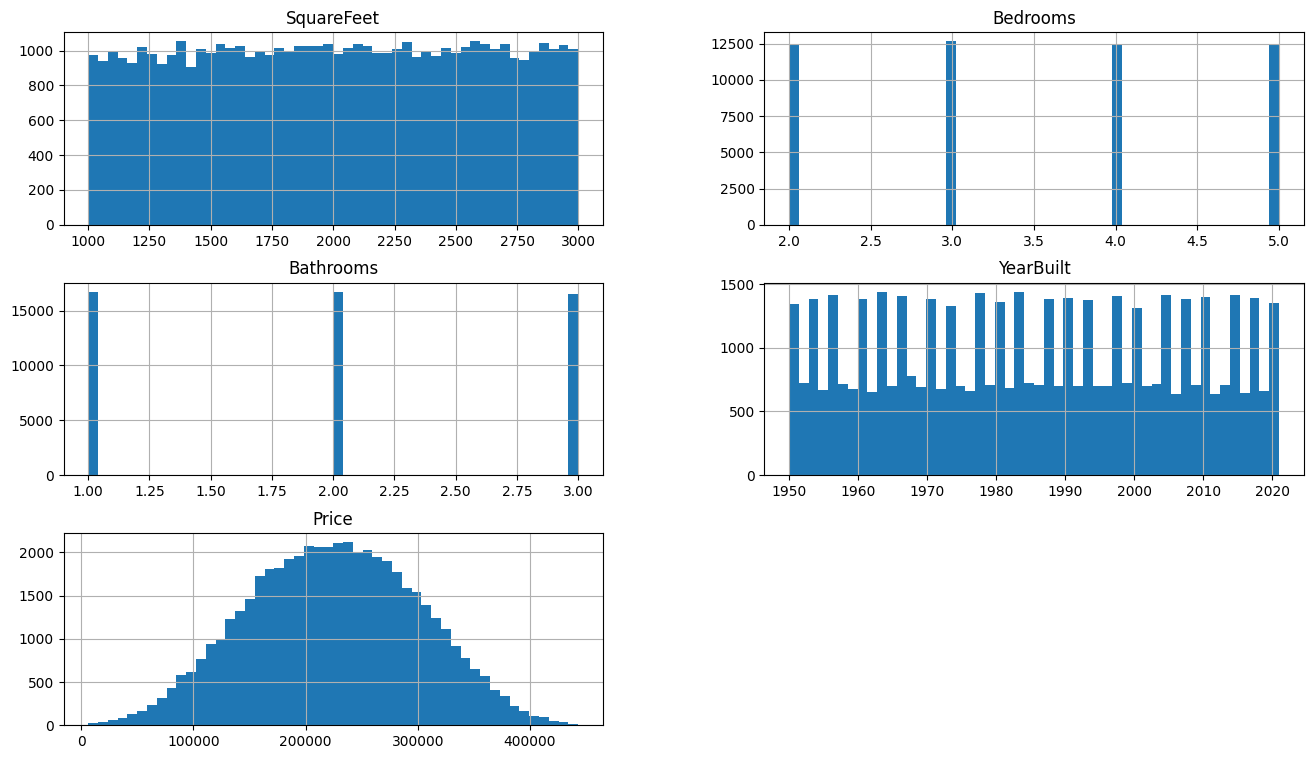

In [ ]:
house.hist(bins=50, figsize=(16, 9))
plt.show()

- Distribusi SquareFeet merata dari 1000 hingga 3000, dan tidak ada ukuran yang mendominasi secara signifikan.
- Bedrooms hanya mencakup 2, 3, 4, dan 5 kamar tidur. Distribusinya seimbang, tetapi 3 kamar lebih mendominasi.
- Bathrooms hanya mencakup 1, 2, dan 3 kamar mandi. Distribusinya cukup seimbang.
- Distribusi harga rumah tampak normal dengan puncak yang berada di sekitar 200.000 - 250.000. Terdapat sedikit kemiringan ke kanan (positive skew), yang menunjukkan bahwa sebagian kecil rumah berharga jauh lebih mahal.
- DiDistribusi tahun pembangunan rumah menunjukkan pola yang relatif stabil dan seimbang di setiap dekade, dengan sedikit fluktuasi periodik.


**Fitur Category**

              Jumlah Sampel  Persentase
Neighborhood                           
Suburb                16699        33.4
Rural                 16660        33.4
Urban                 16581        33.2


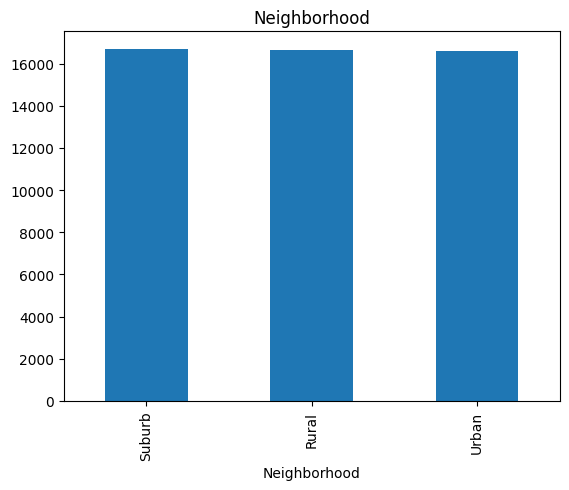

In [ ]:
feature = categorical_features[0]
count = house[feature].value_counts()
percent = 100 * house[feature].value_counts(normalize=True)

df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)
plt.show()

Insight:
- Distribusi seluruh kategori dalam fitur Neighborhood menunjukkan pola yang hampir seragam, dengan jumlah sampel yang relatif merata di setiap kategori.

## Multivariate Analysis

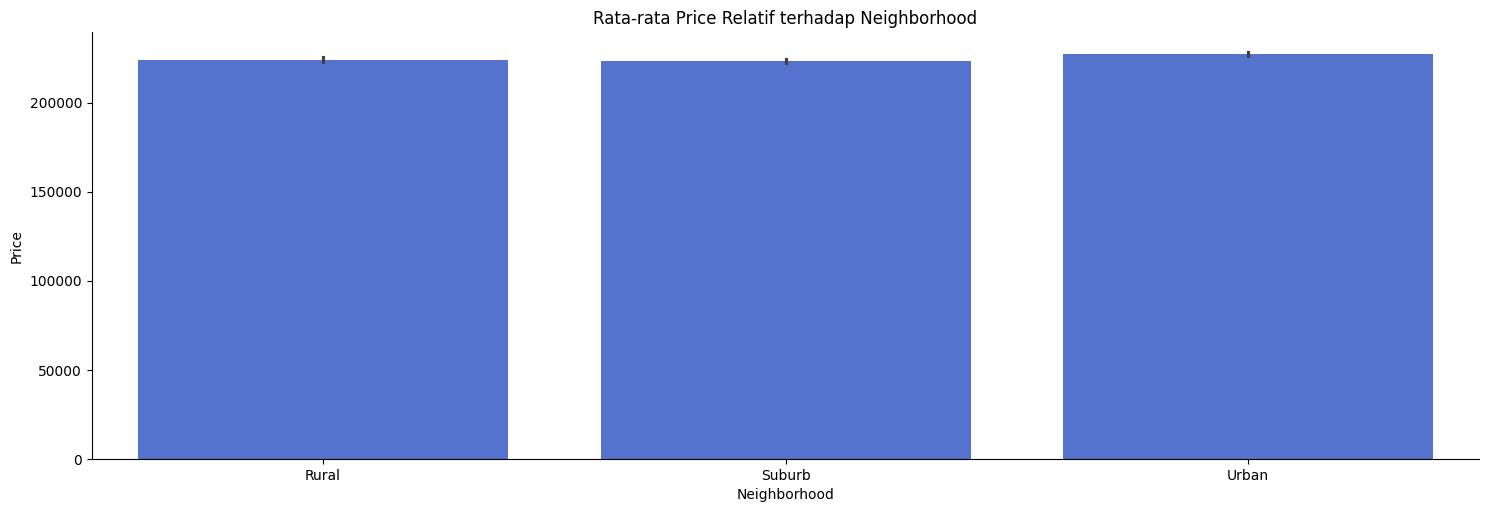

In [ ]:
sns.catplot(x='Neighborhood', y='Price', kind='bar', dodge=False, height = 5, aspect = 3, data = house, color='royalblue')
plt.title(f'Rata-rata Price Relatif terhadap Neighborhood')
plt.show()

Insight:
- Berdasarkan visualisasi, rata-rata harga rumah di setiap kategori Neighborhood (Rural, Suburb, Urban) terlihat relatif setara. Hal ini menunjukkan bahwa variabel Neighborhood mungkin tidak memiliki pengaruh yang signifikan terhadap Price.

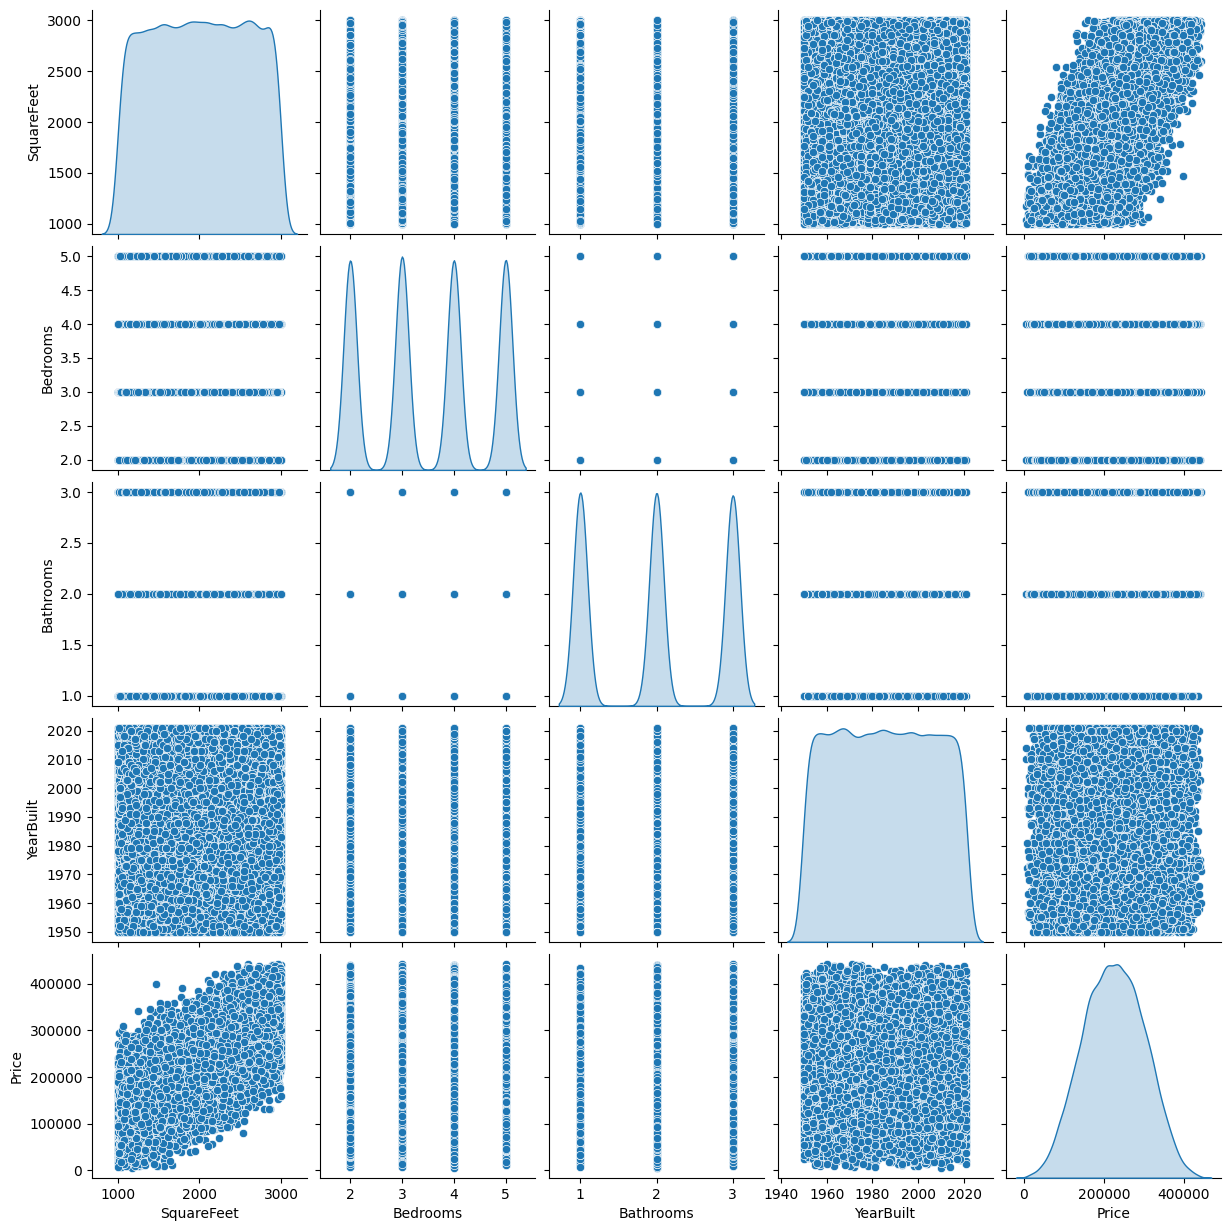

In [ ]:
sns.pairplot(house, diag_kind='kde')
plt.show()

Insight:
- Price dan SquareFeet terlihat memiliki hubungan positif yang kuat, di mana semakin besar luas bangunan semakin tinggi pula harganya. Ini dapat mengindikasikan bahwa luas bangunan adalah salah satu prediktor yang kuat.
- Price dan Bedrooms terlihat tidak memiliki korelasi yang kuat.
- Price dan Bathrooms terlihat tidak memiliki korelasi yang kuat juga.
- Price dan YearBuilt terlihat memiliki pola acak, yang dapat mengindikasikan bahwa keduanya tidak memiliki pola korelasi yang jelas.

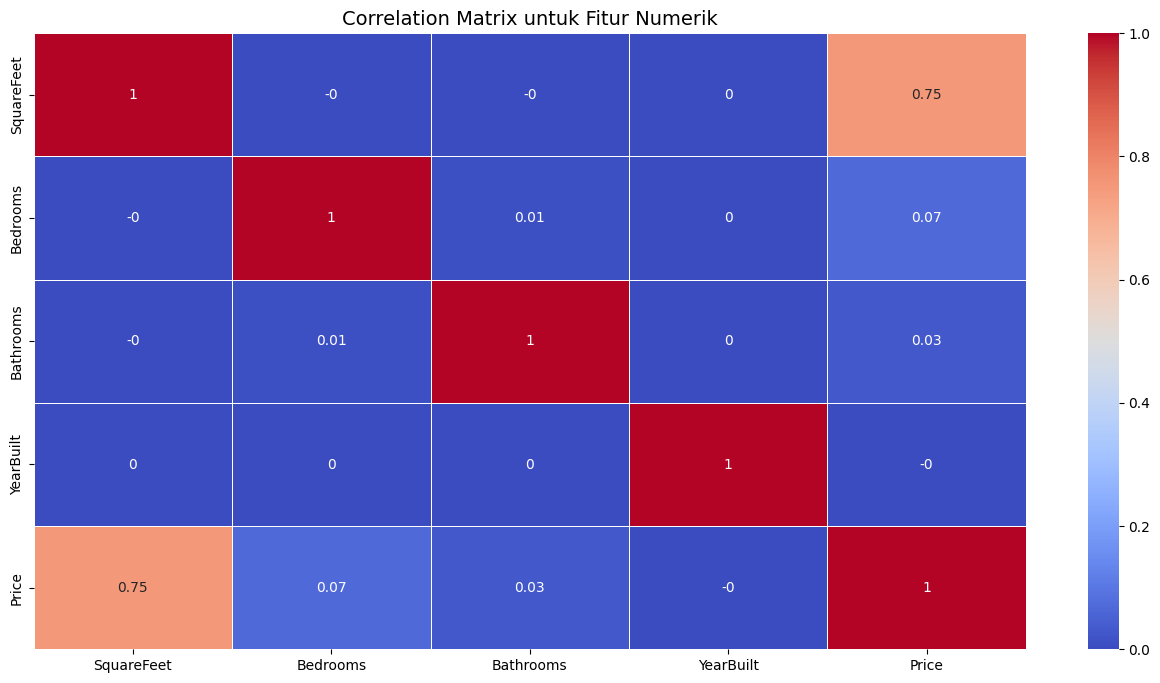

In [ ]:
plt.figure(figsize=(16, 8))

corr_matrix = house[numerical_features].corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix untuk Fitur Numerik', size=14)
plt.show()

Insight:
- Price dan SquareFeet memiliki korelasi yang cukup kuat, yakni sebesar 0,75.
- Price dan Bedrooms memiliki korelasi yang lemah mendekati 0, yaitu sebesar 0,07.
- Price dan Bathrooms memiliki korelasi yang sama lemahnya, mendekati 0, hanya sebesar 0,03.
- Price dan YearBuilt memiliki korelasi yang sangat kecil dan negatif hanya -0. Fitur ini dapat dipertimbangkan untuk dihapus.
- Tidak ada multikolinearitas yang signifikan sehingga PCA tidak perlu dilakukan.

In [ ]:
# Menghapus fitur Year
house.drop(['YearBuilt'], inplace=True, axis=1)
house.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,Price
0,2126,4,1,Rural,215355.283618
1,2459,3,2,Rural,195014.221626
2,1860,2,1,Suburb,306891.012076
3,2294,2,1,Urban,206786.787153
4,2130,5,2,Suburb,272436.239065


# Data Preparation

### Menangani Outlier

In [ ]:
# Fungsi untuk menangani outlier dalam beberapa iterasi (2x)
def remove_outliers(df, column, max_iter=2):
  for i in range(max_iter):
    ## Menghitung Q1, Q3, dan IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

In [ ]:
# Menangani outlier pada dataset hourse
house = remove_outliers(house, 'Price')

(49940, 6)


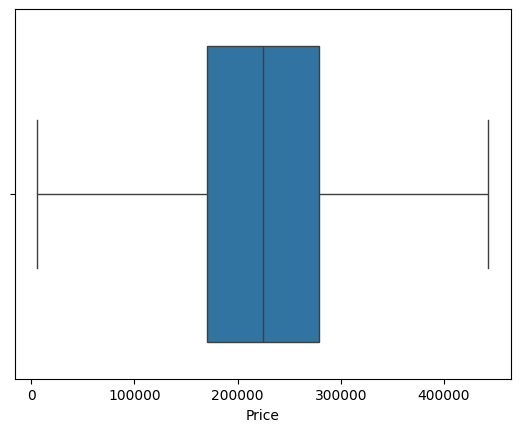

In [ ]:
# Menampilkan hasil dari pembersihan outliers
print(house.shape)
sns.boxplot(x=house['Price'])
plt.show()

Insight:

- Outlier pada fitur Price berhasil ditangani setelah dilakukan pembersihan dalam 2x iterasi dan jumlah sampel data berkurang dari 50.000 menjadi 49.940.

### Encoding Fitur Kategori

In [ ]:
# Encoding menggunakan One Hot Encoding
house = pd.concat([house, pd.get_dummies(house['Neighborhood'], prefix='Neighborhood')],axis=1)
house.drop(['Neighborhood'], axis=1, inplace=True)

In [ ]:
house.head()

,SquareFeet,Bedrooms,Bathrooms,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,215355.283618,True,False,False
1,2459,3,2,195014.221626,True,False,False
2,1860,2,1,306891.012076,False,True,False
3,2294,2,1,206786.787153,False,False,True
4,2130,5,2,272436.239065,False,True,False


### Train-Test Split

In [ ]:
X = house.drop(['Price'], axis=1)
y = house['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total number of sample in whole dataset: {len(X)}')
print(f'Total number of sample in train dataset: {len(X_train)}')
print(f'Total number of sample in test dataset: {len(X_test)}')

Total number of sample in whole dataset: 49940
Total number of sample in train dataset: 39952
Total number of sample in test dataset: 9988


In [ ]:
# Standarisasi terhadap Train dataset
numerical_features = ['SquareFeet', 'Bedrooms', 'Bathrooms']

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,SquareFeet,Bedrooms,Bathrooms
43627,0.941723,1.347212,0.005520
44658,-0.818635,-1.340932,1.230759
11235,-0.168710,-1.340932,0.005520
21556,0.225763,1.347212,-1.219719
34768,-1.293046,1.347212,0.005520


In [ ]:
X_train[numerical_features].describe().round(4)

,SquareFeet,Bedrooms,Bathrooms
count,39952.0000,39952.0000,39952.0000
mean,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.7483,-1.3409,-1.2197
25%,-0.8569,-0.4449,-1.2197
50%,0.0033,-0.4449,0.0055
75%,0.8670,0.4512,1.2308
max,1.7255,1.3472,1.2308


Insight:
- Setelah standarisasi, rata-rata nilai untuk fitur SquareFeet dan Bedrooms adalah -0, sedangkan Bathrooms 0.
- Setelah standarisasi, SquareFeet berada pada rentang -1,7483 hingga 1,7255, Bedrooms berada pada rentang -1,3409 hingga 1,3472, dan Bathroom berada pada rentang 1,2197 hingga 1,2308.

# Model Development

#### **Solution 1**

In [ ]:
# Inisialisasi model
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=60, random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Latih model dengan data training
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Simpan dalam dictionary
models = {
    'LR': lr_model,
    'RF': rf_model,
    'GB': gb_model
}

#### **Solution 2**

In [ ]:
# Random Forest with Randomized Search
rf = RandomForestRegressor(random_state=42)
rf_param = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(rf, rf_param, cv=5, n_iter=10, random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
print(best_rf)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=50, random_state=42)


In [ ]:
# Gradient Boosting with Randomized Search
gb = GradientBoostingRegressor(random_state=42)
gb_param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

gb_search = RandomizedSearchCV(gb, gb_param, cv=5, n_iter=10, random_state=42, n_jobs=-1)
gb_search.fit(X_train, y_train)
best_gb = gb_search.best_estimator_
print(best_gb)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, random_state=42)


In [ ]:
# Simpan dalam dictionary
tuned_models = {
    'Tuned_RF': best_rf,
    'Tuned_GB': best_gb
}

Insight:
- Parameter yang dihasilkan oleh RandomizesSearch untuk model Random Forest mencakup `max_depth=5`, `min_samples_leaf=2`, `min_samples_split=10`, `n_estimators=50`, dan `random_state=42`.
- Parameter yang dihasilkan oleh RandomizedSearch untuk model Gradient Boosting mencakup `learning_rate=0.05`, `max_depth=5`, dan `random_state=42`

# Model Evaluation

In [ ]:
# Scaling terhadap fitur X_test
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-36-e312eabb8d5a>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.59859958  0.24487853 -1.56413766 ...  0.22228755  1.21976622
  1.69591458]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
<ipython-input-36-e312eabb8d5a>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.34093189 -1.34093189  0.45116388 ...  0.45116388  1.34721176
  0.45116388]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
<ipython-input-36-e312eabb8d5a>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.21971877  0.0055202  -1.21971877 ... 

In [ ]:
# Fungsi untuk evaluasi model
def evaluate_models(models, X_train, y_train, X_test, y_test):
  # Inisialisasi dataframe untuk menyimpan MSE
    mse = pd.DataFrame(columns=['train', 'test'], index=models.keys())

    for name, model in models.items():
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        # Menghitung MSE
        mse.loc[name, 'train'] = mean_squared_error(y_train, train_pred) / 1e4
        mse.loc[name, 'test'] = mean_squared_error(y_test, test_pred) / 1e4

    return mse

#### **Solution 1**

In [ ]:
# Melakukan evaluasi dan menampilkan hasil MSE untuk solusi 1
mse1 = evaluate_models(models, X_train, y_train, X_test, y_test)

mse1

,train,test
LR,247463.437455,244633.604985
RF,82999.97236,317759.484147
GB,245017.057283,245068.287107


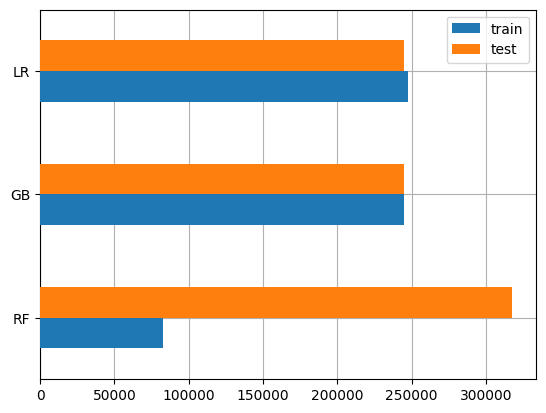

In [ ]:
# Menampilkan visualisasi hasil MSE untuk solusi 1
fig, ax = plt.subplots()
mse1.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Insight:
- Model Linear Regression (LR) memiliki selisih MSE yang kecil (~2.829), menunjukkan bahwa model ini memiliki performa yang konsisten antara data latih dan uji, meskipun tingkat kesalahan absolutnya lebih tinggi dibandingkan model lain.
- Model Random Forest (RF) menunjukkan selisih MSE yang sangat besar antara data latih dan data uji (~234.759). Hal ini mengindikasikan bahwa model overfitting, di mana performa model sangat baik pada data latih tetapi gagal melakukan generalisasi pada data uji.
- Model Gradient Boosting (GB) menunjukkan selisih MSE yang sangat kecil (~51), menjadikannya model dengan generalization paling stabil di antara ketiga model. Ini menandakan performa yang seimbang dan kuat di kedua dataset.

#### **Solution 2**

In [ ]:
# Melakukan evaluasi dan menampilkan hasil MSE untuk solusi 2
mse2 = evaluate_models(tuned_models, X_train, y_train, X_test, y_test)

mse2

,train,test
Tuned_RF,246917.765664,246255.769967
Tuned_GB,242748.470914,245311.248215


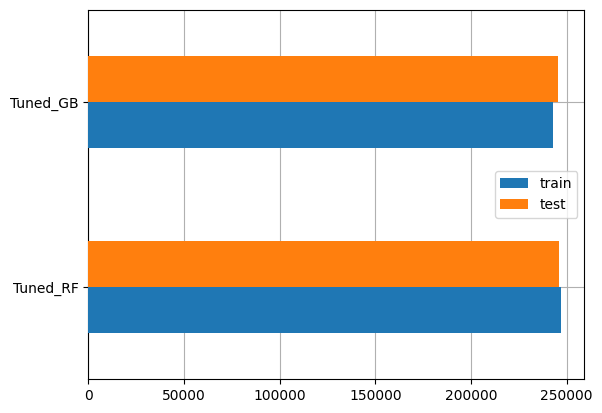

In [ ]:
# Menampilkan visualisasi hasil MSE untuk solusi 2
fig, ax = plt.subplots()
mse2.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Insight:
- Setelah melakukan penyesuaian pada paramaeter, model Random Forest (RF) menunjukkan selisih antara MSE latih dan uji yang sangat kecil (~662), yang mengindikasikan model ini sangat stabil dan memiliki generalisasi yang baik. Performa di data latih dan uji juga hampir identik, yang dapat diartikan bahwa model sudah tidak overfitting maupun underfitting.
- Setelah melakukan penyesuaian pada paramaeter, model Gradient Boosting (GB) menunjukkan selisih antara MSE latih dan uji yang sedikit lebih besar (~2.563).

## Prediction

#### **Solution 1**

In [ ]:
# Membandingkan hasil prediksi semua model dalam solusi 1
prediction = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in models.items():
    pred_dict['prediksi_'+name] = model.predict(prediction).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_LR,prediksi_RF,prediksi_GB
39738,316040.899494,305079.8,309846.8,306072.0


Insight:
- Linear Regression kurang tepat untuk kasus ini karena sangat jauh dari nilai aktual.
- Random Forest terlihat lebih baik dari Linear Regression, tetapi mengingat hasil evaluasinya mengindikasikan bahwa model ini overfitting menyebabkan keandalan prediksinya berkurang.
- Gradient Boosting memberikan prediksi yang paling akurat dan paling dekat dengan nilai aktual.

#### **Solution 2**

In [ ]:
# Membandingkan hasil prediksi semua model dalam solusi 2
prediction = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in tuned_models.items():
    pred_dict['prediksi_'+name] = model.predict(prediction).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_Tuned_RF,prediksi_Tuned_GB
39738,316040.899494,313515.3,309166.8


Insight:
- Tuned Random Forest memberikan hasil prediksi yang paling dekat dengan nilai aktual, dengan selisih sekitar 2.525,6.
- Tuned Gradient Boosting juga memberikan prediksi yang cukup baik, meskipun masih terdapat selisih sekitar 6.874,1 dari nilai aktual.